CIND 820- Big Data Analytics Project

Using Machine Learning for Prediction of Early Readmission of Diabetic Patients

Supervised by: Ceni Babaoglu

Presented by: Nehal Gamal Mohamed (501278190)


In [1]:
!pip install pandas
import sys
!pip install matplotlib
!pip install graphviz

In [2]:
#importing necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#Uploading diabetic_data csv file
from google.colab import files
data = files.upload()
#Instintiating DataReader class
class DataReader:
    def read_csv(self, filename):
        df = pd.read_csv(filename)
        return df

filename = next(iter(data))
data_reader = DataReader()
df = data_reader.read_csv(filename)
#Displaying the first 10 records of the dataset
print(df.head(10))


Saving diabetic_data (version 1).csv to diabetic_data (version 1).csv
   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        

In [4]:
#Displaying variables data types
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-n

In [5]:
#Defining lists for categorical variables and numeric variables
categorical_columns = [
    'race',
    'gender',
    'age',
    'weight',
    'payer_code',
    'medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3',
    'max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'change',
    'diabetesMed',
    'readmitted'
]

numeric_columns = [
    'encounter_id',
    'patient_nbr',
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]


In [6]:
#Dataset Description
print("Dataset Description:")
print(df.describe(include='all'))

Dataset Description:
        encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       10

In [7]:
#Converted blank and "?" to NaN to represent missing values
# Replace '?' and blank cells with NaN
df.replace({'?': pd.NA, '': pd.NA}, inplace=True)

# Replaced 'None' in 'max_glu_serum' and 'A1Cresult' to be seen as 'No Test' category and not as missing values
df['max_glu_serum'].replace({pd.NA: 'No Test', 'None': 'No Test'}, inplace=True)
df['A1Cresult'].replace({pd.NA: 'No Test', 'None': 'No Test'}, inplace=True)
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepi

In [8]:
#Handling missing values in categorical columns by adding "Missing" as subcategory
for col in categorical_columns:
    df[col].fillna('Missing', inplace=True)
print(df[categorical_columns].isnull().sum())



race                        0
gender                      0
age                         0
weight                      0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-

In [9]:
# converting numeric columns to numeric data types and categorical columns to category data type
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
print(df.dtypes)
print(df[numeric_columns].dtypes)


encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
#Checking for duplicate records
duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")

Number of duplicate records: 0


In [12]:
# Here I wanted to clean the dataframe by removing irrelevant columns, columns with high missing values
df_cleaned = df.copy()
columns_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code']
df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Here I put a threshold of 95% for List of columns dominated by "No" category since they have very low variance and no added value
columns_dominated_by_no = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

threshold = 0.95
columns_to_drop_dominated = []
for col in columns_dominated_by_no:
    if df_cleaned[col].value_counts(normalize=True).get('No', 0) > threshold:
        columns_to_drop_dominated.append(col)
df_cleaned.drop(columns=columns_to_drop_dominated, inplace=True)

# Check the remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(df_cleaned.columns)
print(df_cleaned.info())

Remaining columns after dropping unnecessary ones:
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'miglitol', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101766 non-null  category
 1   gender                    101766 non-null  category
 2   age                       101766 non-nu

In [13]:
# Identify and verifying remaining categorical columns for onehot coding
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns.tolist()
print("Categorical columns for one-hot encoding:", categorical_columns)


Categorical columns for one-hot encoding: ['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'miglitol', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [14]:
# One-hot encode the remaining categorical columns
df_onehot_coded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=False)
boolean_columns = df_onehot_coded.select_dtypes(include='bool').columns
df_onehot_coded[boolean_columns] = df_onehot_coded[boolean_columns].astype(int)
print(df_onehot_coded.head())
print(df_onehot_coded.columns)


   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ...  insulin_No  \
0                  0                 0 

In [15]:
# To assess the normality of the numerical variables, I conducted the Shapiro-Wilk test.
# Despite the test results indicating that none of the variables followed a normal distribution,
# I chose to retain the outliers. The reason behind this decision was that the count of outliers
# across the numeric variables was not substantial, and removing them could potentially reduce
# the variance and valuable information in the dataset.
from scipy.stats import shapiro
dependent_var_columns = ['readmitted_>30', 'readmitted_NO', 'readmitted_<30']
numerical_columns = df_onehot_coded.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(dependent_var_columns)

# Perform the Shapiro-Wilk test
shapiro_results = {}
for col in numerical_columns:
    stat, p_value = shapiro(df_onehot_coded[col])
    shapiro_results[col] = (stat, p_value)
shapiro_df = pd.DataFrame(shapiro_results, index=['Statistic', 'p-value']).T
display(shapiro_df)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Statistic,p-value
admission_type_id,0.721419,0.0
discharge_disposition_id,0.568973,0.0
admission_source_id,0.737137,0.0
time_in_hospital,0.886919,0.0
num_lab_procedures,0.984858,0.0
...,...,...
insulin_Up,0.363303,0.0
change_Ch,0.634863,0.0
change_No,0.635076,0.0
diabetesMed_No,0.520568,0.0


In [16]:
#Next step is to normalize the independent variables to insure scalability
# Function to normalize numerical columns
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())
dependent_var_columns = ['readmitted_>30', 'readmitted_NO', 'readmitted_<30']
numerical_columns = df_onehot_coded.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(dependent_var_columns)
for col in numerical_columns:
    df_onehot_coded[col] = normalize(df_onehot_coded[col])
print(df_onehot_coded.head())



   admission_type_id  discharge_disposition_id  admission_source_id  \
0           0.714286                  0.888889                 0.00   
1           0.000000                  0.000000                 0.25   
2           0.000000                  0.000000                 0.25   
3           0.000000                  0.000000                 0.25   
4           0.000000                  0.000000                 0.25   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0          0.000000            0.305344        0.000000           0.0000   
1          0.153846            0.442748        0.000000           0.2125   
2          0.076923            0.076336        0.833333           0.1500   
3          0.076923            0.328244        0.166667           0.1875   
4          0.000000            0.381679        0.000000           0.0875   

   number_outpatient  number_emergency  number_inpatient  ...  insulin_No  \
0           0.000000               0.0 

In [17]:
# Checking if the numerical columns are normalized
for col in numerical_columns:
    min_val = df_onehot_coded[col].min()
    max_val = df_onehot_coded[col].max()
    print(f'{col}: min = {min_val}, max = {max_val}')


admission_type_id: min = 0.0, max = 1.0
discharge_disposition_id: min = 0.0, max = 1.0
admission_source_id: min = 0.0, max = 1.0
time_in_hospital: min = 0.0, max = 1.0
num_lab_procedures: min = 0.0, max = 1.0
num_procedures: min = 0.0, max = 1.0
num_medications: min = 0.0, max = 1.0
number_outpatient: min = 0.0, max = 1.0
number_emergency: min = 0.0, max = 1.0
number_inpatient: min = 0.0, max = 1.0
number_diagnoses: min = 0.0, max = 1.0
race_AfricanAmerican: min = 0.0, max = 1.0
race_Asian: min = 0.0, max = 1.0
race_Caucasian: min = 0.0, max = 1.0
race_Hispanic: min = 0.0, max = 1.0
race_Missing: min = 0.0, max = 1.0
race_Other: min = 0.0, max = 1.0
gender_Female: min = 0.0, max = 1.0
gender_Male: min = 0.0, max = 1.0
gender_Unknown/Invalid: min = 0.0, max = 1.0
age_[0-10): min = 0.0, max = 1.0
age_[10-20): min = 0.0, max = 1.0
age_[20-30): min = 0.0, max = 1.0
age_[30-40): min = 0.0, max = 1.0
age_[40-50): min = 0.0, max = 1.0
age_[50-60): min = 0.0, max = 1.0
age_[60-70): min = 0.0, 

In [18]:
# Next step is to perform unsupervised learning through clustering
# to check any subcategories within the dataset and upon that we can take informed decisions
# First we need to drop the dependent variable 'readmitted' before clustering
# Drop the dependent variable columns (class labels)
df_clustering = df_onehot_coded.drop(columns=['readmitted_>30', 'readmitted_NO', 'readmitted_<30'])
print(df_clustering.head())

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           0.714286                  0.888889                 0.00   
1           0.000000                  0.000000                 0.25   
2           0.000000                  0.000000                 0.25   
3           0.000000                  0.000000                 0.25   
4           0.000000                  0.000000                 0.25   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0          0.000000            0.305344        0.000000           0.0000   
1          0.153846            0.442748        0.000000           0.2125   
2          0.076923            0.076336        0.833333           0.1500   
3          0.076923            0.328244        0.166667           0.1875   
4          0.000000            0.381679        0.000000           0.0875   

   number_outpatient  number_emergency  number_inpatient  ...  \
0           0.000000               0.0          0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

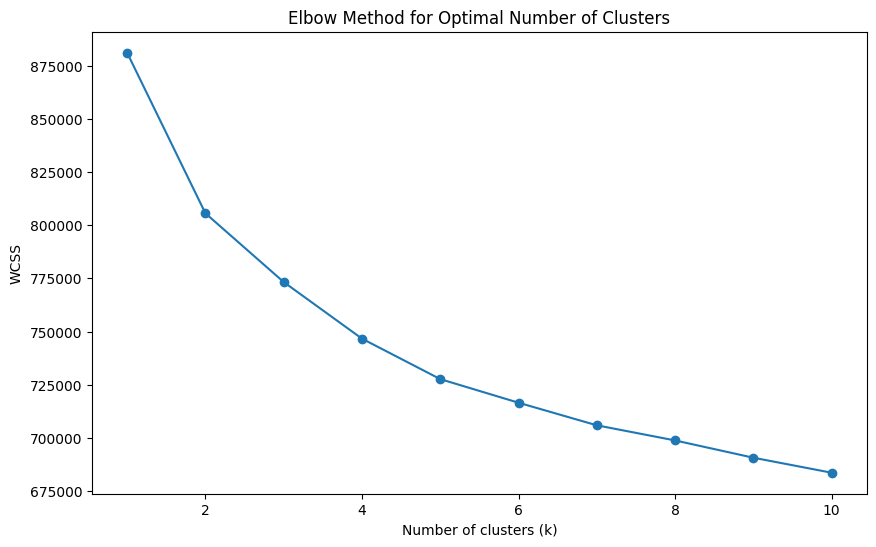

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Here we need to set the best number of clusters using the Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow Method, From the visualization we can see the number of clusters (K) = 4
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()




In [ ]:
!pip install kneed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

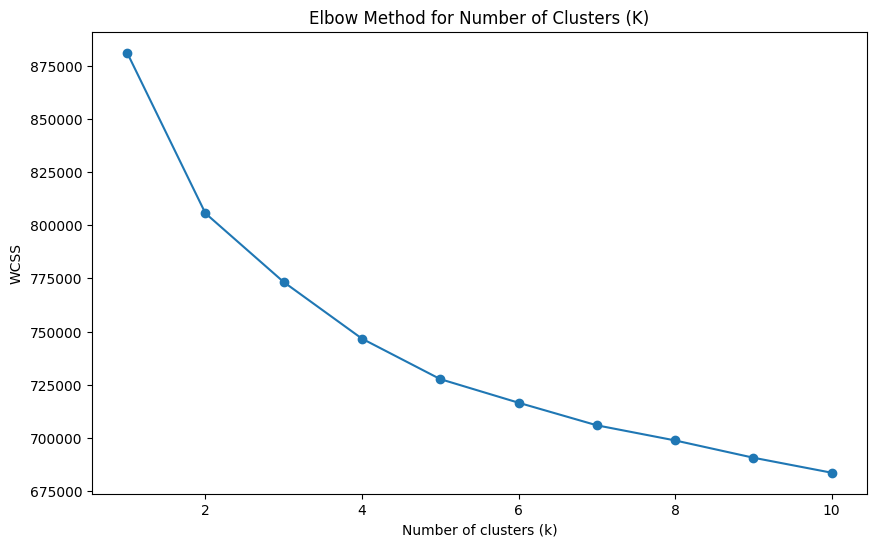

number of clusters is: 4


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# This is another way of knowing the best number of clusters using the pythong library (kneed) and the output is also 4 clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow Method, From the visualization we can see the number of clusters (K) = 4
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Number of Clusters (K)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f'number of clusters is: {optimal_k}')


In [19]:
# Here we will apply KMeans clustering with the number of clusters set to 4
from sklearn.cluster import KMeans
if 'Cluster' in df_clustering.columns:
    df_clustering.drop(columns=['Cluster'], inplace=True)

clusters_number = 4
kmeans = KMeans(n_clusters=clusters_number, random_state=42)
kmeans.fit(df_clustering)
df_clustering['Cluster'] = kmeans.labels_
print(df_clustering.head())
print(df_clustering.info())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   admission_type_id  discharge_disposition_id  admission_source_id  \
0           0.714286                  0.888889                 0.00   
1           0.000000                  0.000000                 0.25   
2           0.000000                  0.000000                 0.25   
3           0.000000                  0.000000                 0.25   
4           0.000000                  0.000000                 0.25   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0          0.000000            0.305344        0.000000           0.0000   
1          0.153846            0.442748        0.000000           0.2125   
2          0.076923            0.076336        0.833333           0.1500   
3          0.076923            0.328244        0.166667           0.1875   
4          0.000000            0.381679        0.000000           0.0875   

   number_outpatient  number_emergency  number_inpatient  ...  miglitol_Up  \
0           0.000000               0.0

<ipython-input-19-e8d17b9d787e>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clustering['Cluster'] = kmeans.labels_


In [20]:
print(df_clustering.columns)
print(df_clustering['Cluster'].head())


Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'miglitol_Up', 'insulin_Down', 'insulin_No', 'insulin_Steady',
       'insulin_Up', 'change_Ch', 'change_No', 'diabetesMed_No',
       'diabetesMed_Yes', 'Cluster'],
      dtype='object', length=2404)
0    2
1    0
2    1
3    3
4    3
Name: Cluster, dtype: int32


In [21]:
# Here I tried to take a look at each centroid for better understanding after clustering
df_clustering.groupby('Cluster').mean()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,miglitol_Steady,miglitol_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.144636,0.101748,0.199480,0.293603,0.331405,0.208673,0.216456,0.009880,0.003438,0.032878,...,0.000482,0.00000,0.264811,0.185685,0.308109,0.241395,1.0,0.0,0.0,1.0
1,0.143768,0.096758,0.197781,0.240272,0.312588,0.218593,0.173128,0.008262,0.002268,0.030061,...,0.000191,0.00000,0.000000,0.481341,0.518659,0.000000,0.0,1.0,0.0,1.0
2,0.146404,0.110916,0.197637,0.234960,0.312242,0.226837,0.153026,0.007886,0.002022,0.027404,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.0,0.0
3,0.151591,0.093742,0.197496,0.282296,0.332048,0.242644,0.213016,0.009288,0.002754,0.030640,...,0.000588,0.00009,0.254364,0.192909,0.312788,0.239939,1.0,0.0,0.0,1.0


In [22]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(df_clustering.drop(columns=['Cluster']), df_clustering['Cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.07041419922936012
